<h1> Model 1: Logistic Regression

<h2> Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import GridSearchCV


<h2> Loading the dataset

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,2,0,2,0,1,0,4,...,0,0,1,0,0,1,0,4,0,1
1,1,1,1,0,0,2,0,1,1,1,...,1,1,0,0,0,0,1,4,2,0
2,1,0,1,1,1,3,1,0,2,1,...,1,0,1,0,1,0,0,4,2,2
3,1,0,0,1,0,0,1,0,2,2,...,0,0,1,0,0,0,1,3,2,1
4,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,0,0,4,0,1


In [3]:
test = pd.read_csv("data/test.csv")
test.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,0,0,3,0,0,0,0,...,1,0,0,1,0,1,0,4,1,1
1,1,1,1,0,0,3,1,0,1,1,...,1,0,1,0,1,0,0,3,0,2
2,0,0,0,0,0,2,1,0,1,1,...,1,0,1,0,0,1,0,3,2,1
3,0,1,1,0,0,3,0,0,1,1,...,0,0,1,0,1,0,0,1,1,2
4,1,1,0,0,0,0,0,0,1,3,...,1,0,1,0,0,0,1,1,1,1


<h5> Basic Information on the Dataset

In [4]:
train.shape


(14254, 22)

In [5]:
train.dtypes

marital_status               int64
high_education_ind           int64
address_change_ind           int64
past_num_of_claims           int64
witness_present_ind          int64
liab_prct                    int64
policy_report_filed_ind      int64
fraud                        int64
age                          int64
safety_grade                 int64
annual_income_category       int64
part_of_month                int64
weekday                      int64
accident_site_Highway        int64
accident_site_Local          int64
accident_site_Parking Lot    int64
channel_Broker               int64
channel_Online               int64
channel_Phone                int64
claim_est_payout_category    int64
age_of_vehicle_category      int64
vehicle_price_category       int64
dtype: object

From the basic exploration above, we can see that the preprocessed train dataset has all features of type int64, which are ready for training models. 

<h2> Spliting Features and Targets

In [6]:
X_train = train.drop('fraud', axis=1)
y_train = train['fraud']

In [7]:
X_test = test.drop('fraud', axis=1)
y_test = test['fraud']

<h2> Checking for Imbalance in Target Column of Train Dataset </h2><br>
We will plot the distribution of the binary classes 0 and 1 in target column y_train to check if there is imbalance between the two classes. 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


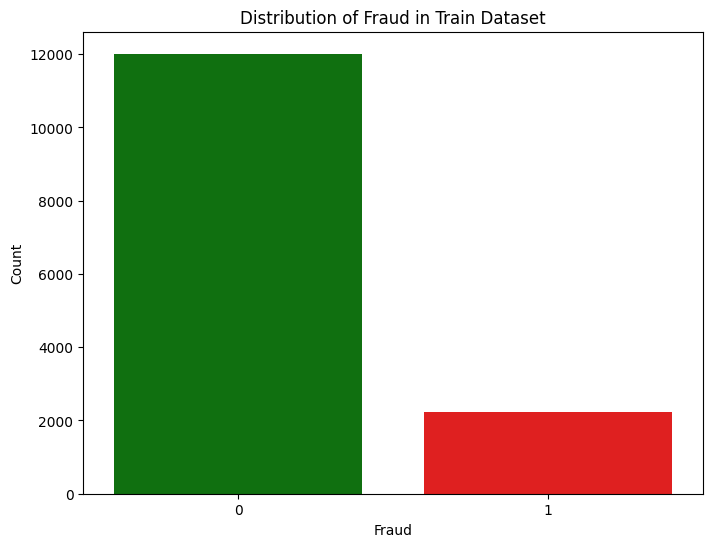

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(y_train, palette=["green", "red"])
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Distribution of Fraud in Train Dataset')
plt.show()

From the plot above, we can see clearly that the target is imbalanced with heavy lean towards 0 in the train dataset. To resolve this issue, we will use random oversampling to balance between the two classes in our target for the train dataset before training our models. 

In [9]:
oversampler = RandomOverSampler(random_state=42)
X_resam, y_resam = oversampler.fit_resample(X_train, y_train)

<h2> Basic Logistic Regression Model </h2><br>
We will firstly train a basic logistic regression model using train dataset. 

In [10]:
lr = LogisticRegression(random_state=42)
lr.fit(X_resam, y_resam)

LogisticRegression(random_state=42)

We will use the above model to predict probability of each class in the test dataset. 

In [11]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]

Firstly, we will use the default threshold of 0.5 for classification.

In [12]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]

y_pred_lr_def = (y_prob_lr > 0.5).astype(int)

We will access the performance of this basic logistic regression model through accuracy, precision, recall, f1-score. 

In [13]:
accuracy_lr_def = accuracy_score(y_test, y_pred_lr_def)
precision_lr_def = precision_score(y_test, y_pred_lr_def)
recall_lr_def = recall_score(y_test, y_pred_lr_def)
f1_lr_def = f1_score(y_test, y_pred_lr_def)

print("Performance of the basic logistic regression model with default threshold of 0.5: \n")
print(f'Accuracy: {accuracy_lr_def:.5f}')
print(f'Precision: {precision_lr_def:.5f}')
print(f'Recall: {recall_lr_def:.5f}')
print(f'F1 Score: {f1_lr_def:.5f}')

Performance of the basic logistic regression model with default threshold of 0.5: 

Accuracy: 0.63973
Precision: 0.24548
Recall: 0.63949
F1 Score: 0.35477


We will also take a look at the classification report and confusion matrix for this prediction. 

In [14]:
print("Classification report:")
print(classification_report(y_test, y_pred_lr_def))

conf_matrix_lr_def = confusion_matrix(y_test, y_pred_lr_def)

TP = conf_matrix_lr_def[1, 1]
FP = conf_matrix_lr_def[0, 1]
TN = conf_matrix_lr_def[0, 0]
FN = conf_matrix_lr_def[1, 0]

print("Confusion matrix:")
print(f'True Positives (TP): {TP}')
print(f'False Positives (FP): {FP}')
print(f'True Negatives (TN): {TN}')
print(f'False Negatives (FN): {FN}')

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      3012
           1       0.25      0.64      0.35       552

    accuracy                           0.64      3564
   macro avg       0.58      0.64      0.55      3564
weighted avg       0.80      0.64      0.69      3564

Confusion matrix:
True Positives (TP): 353
False Positives (FP): 1085
True Negatives (TN): 1927
False Negatives (FN): 199


Secondly, we will use the optimal threshold from the ROC curve for classification. 

In [15]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

# Calculate the Youden index at each threshold setting
j_scores_lr = tpr_lr - fpr_lr

# Find the threshold setting that maximizes the Youden index
optimal_idx_lr = np.argmax(j_scores_lr)
optimal_threshold_lr = thresholds_lr[optimal_idx_lr]
print(f'Optimal threshold for the basic logistic regression model: {optimal_threshold_lr}')

Optimal threshold for the basic logistic regression model: 0.4486923235979855


In [16]:
y_pred_lr_opt = (y_prob_lr > optimal_threshold_lr).astype(int)

accuracy_lr_opt = accuracy_score(y_test, y_pred_lr_opt)
precision_lr_opt = precision_score(y_test, y_pred_lr_opt)
recall_lr_opt = recall_score(y_test, y_pred_lr_opt)
f1_lr_opt = f1_score(y_test, y_pred_lr_opt)

print("Performance of the basic logistic regression model with optimal threshold: \n")
print(f'Accuracy: {accuracy_lr_opt:.5f}')
print(f'Precision: {precision_lr_opt:.5f}')
print(f'Recall: {recall_lr_opt:.5f}')
print(f'F1 Score: {f1_lr_opt:.5f}')

Performance of the basic logistic regression model with optimal threshold: 

Accuracy: 0.57407
Precision: 0.23137
Recall: 0.75362
F1 Score: 0.35404


We will also take a look at the classification report and confusion matrix for this prediction. 

In [17]:
print("Classification report:")
print(classification_report(y_test, y_pred_lr_opt))

conf_matrix_lr_opt = confusion_matrix(y_test, y_pred_lr_opt)

TP_opt = conf_matrix_lr_opt[1, 1]
FP_opt = conf_matrix_lr_opt[0, 1]
TN_opt = conf_matrix_lr_opt[0, 0]
FN_opt = conf_matrix_lr_opt[1, 0]

print("Confusion matrix:")
print(f'True Positives (TP): {TP_opt}')
print(f'False Positives (FP): {FP_opt}')
print(f'True Negatives (TN): {TN_opt}')
print(f'False Negatives (FN): {FN_opt}')

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      3012
           1       0.23      0.75      0.35       552

    accuracy                           0.57      3564
   macro avg       0.58      0.65      0.52      3564
weighted avg       0.82      0.57      0.63      3564

Confusion matrix:
True Positives (TP): 416
False Positives (FP): 1382
True Negatives (TN): 1630
False Negatives (FN): 136


We can see that the optimal threshold has improved the recall of the basic logistic regression model from 0.63949 to 0.75362. 

<h2> Hyperparameter Tuning </h2><br>
Next, we will attempt to improve the performance of logistic regression through hyperparameter tuning. We will use <code>GridSearchCV</code> to discover the best parameters that give the best recall over a range of params. 

In [18]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [50, 100, 200],
}

lr_gs = LogisticRegression(random_state=42)

grid_search = GridSearchCV(lr_gs, param_grid, scoring='recall', cv=5)
grid_search.fit(X_resam, y_resam)

/Users/yanghaoying/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yanghaoying/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yanghaoying/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yanghaoying/Library/Python/3.9/lib/python/site-packages/sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [50, 100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='recall')

In [19]:
print("Best Hyperparameters from GridSearchCV:\n", grid_search.best_estimator_.get_params())

Best Hyperparameters from GridSearchCV:
 {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<h2> New Logistic Regression Model with Tuned Hyperparameters</h2><br>
Lastly, we will train an advanced logistic regression model using the best hyperparameters we obtained from GridSearchCV. 

In [20]:
lr_tuned = LogisticRegression(C=0.1, 
                              fit_intercept=True,
                              max_iter=50,
                              multi_class='auto',
                              penalty='l2', 
                              solver='lbfgs',
                              random_state=42)
lr_tuned.fit(X_resam, y_resam)

LogisticRegression(C=0.1, max_iter=50, random_state=42)

We will use the above model to predict probability of each class in the test dataset. 

In [21]:
y_prob_lr_tuned = lr_tuned.predict_proba(X_test)[:, 1]

Firstly, we will use the default threshold of 0.5 for classification.

In [22]:
y_pred_lr_def_tuned = (y_prob_lr_tuned > 0.5).astype(int)

We will access the performance of this tuned logistic regression model through accuracy, precision, recall, f1-score.

In [23]:
accuracy_lr_def_tuned = accuracy_score(y_test, y_pred_lr_def_tuned)
precision_lr_def_tuned = precision_score(y_test, y_pred_lr_def_tuned)
recall_lr_def_tuned = recall_score(y_test, y_pred_lr_def_tuned)
f1_lr_def_tuned = f1_score(y_test, y_pred_lr_def_tuned)

print("Performance of the tuned logistic regression model with default threshold of 0.5: \n")
print(f'Accuracy: {accuracy_lr_def_tuned:.5f}')
print(f'Precision: {precision_lr_def_tuned:.5f}')
print(f'Recall: {recall_lr_def_tuned:.5f}')
print(f'F1 Score: {f1_lr_def_tuned:.5f}')

Performance of the tuned logistic regression model with default threshold of 0.5: 

Accuracy: 0.63973
Precision: 0.24548
Recall: 0.63949
F1 Score: 0.35477


We will also take a look at the classification report and confusion matrix for this prediction. 

In [24]:
print("Classification report:")
print(classification_report(y_test, y_pred_lr_def_tuned))

conf_matrix_lr_def_tuned = confusion_matrix(y_test, y_pred_lr_def_tuned)

TP_def_tuned = conf_matrix_lr_def_tuned[1, 1]
FP_def_tuned = conf_matrix_lr_def_tuned[0, 1]
TN_def_tuned = conf_matrix_lr_def_tuned[0, 0]
FN_def_tuned = conf_matrix_lr_def_tuned[1, 0]

print("Confusion matrix:")
print(f'True Positives (TP): {TP_def_tuned}')
print(f'False Positives (FP): {FP_def_tuned}')
print(f'True Negatives (TN): {TN_def_tuned}')
print(f'False Negatives (FN): {FN_def_tuned}')

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      3012
           1       0.25      0.64      0.35       552

    accuracy                           0.64      3564
   macro avg       0.58      0.64      0.55      3564
weighted avg       0.80      0.64      0.69      3564

Confusion matrix:
True Positives (TP): 353
False Positives (FP): 1085
True Negatives (TN): 1927
False Negatives (FN): 199


Secondly, we will use the optimal threshold from the ROC curve for classification. 

In [25]:
fpr_lr_tuned, tpr_lr_tuned, thresholds_lr_tuned = roc_curve(y_test, y_prob_lr_tuned)

# Calculate the Youden index at each threshold setting
j_scores_lr_tuned = tpr_lr_tuned - fpr_lr_tuned

# Find the threshold setting that maximizes the Youden index
optimal_idx_lr_tuned = np.argmax(j_scores_lr_tuned)
optimal_threshold_lr_tuned = thresholds_lr_tuned[optimal_idx_lr_tuned]
print(f'Optimal threshold for the tuned logistic regression model: {optimal_threshold_lr_tuned}')

Optimal threshold for the tuned logistic regression model: 0.43711091806047175


In [26]:
y_pred_lr_opt_tuned = (y_prob_lr_tuned > optimal_threshold_lr_tuned).astype(int)

accuracy_lr_opt_tuned = accuracy_score(y_test, y_pred_lr_opt_tuned)
precision_lr_opt_tuned = precision_score(y_test, y_pred_lr_opt_tuned)
recall_lr_opt_tuned = recall_score(y_test, y_pred_lr_opt_tuned)
f1_lr_opt_tuned = f1_score(y_test, y_pred_lr_opt_tuned)

print("Performance of the tuned logistic regression model with optimal threshold: \n")
print(f'Accuracy: {accuracy_lr_opt_tuned:.5f}')
print(f'Precision: {precision_lr_opt_tuned:.5f}')
print(f'Recall: {recall_lr_opt_tuned:.5f}')
print(f'F1 Score: {f1_lr_opt_tuned:.5f}')

Performance of the tuned logistic regression model with optimal threshold: 

Accuracy: 0.55976
Precision: 0.22822
Recall: 0.77355
F1 Score: 0.35246


We will also take a look at the classification report and confusion matrix for this prediction. 

In [27]:
print("Classification report:")
print(classification_report(y_test, y_pred_lr_opt_tuned))

conf_matrix_lr_opt_tuned = confusion_matrix(y_test, y_pred_lr_opt_tuned)

TP_opt_tuned = conf_matrix_lr_opt_tuned[1, 1]
FP_opt_tuned = conf_matrix_lr_opt_tuned[0, 1]
TN_opt_tuned = conf_matrix_lr_opt_tuned[0, 0]
FN_opt_tuned = conf_matrix_lr_opt_tuned[1, 0]

print("Confusion matrix:")
print(f'True Positives (TP): {TP_opt_tuned}')
print(f'False Positives (FP): {FP_opt_tuned}')
print(f'True Negatives (TN): {TN_opt_tuned}')
print(f'False Negatives (FN): {FN_opt_tuned}')

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67      3012
           1       0.23      0.77      0.35       552

    accuracy                           0.56      3564
   macro avg       0.58      0.65      0.51      3564
weighted avg       0.82      0.56      0.62      3564

Confusion matrix:
True Positives (TP): 427
False Positives (FP): 1444
True Negatives (TN): 1568
False Negatives (FN): 125


We can see that the optimal threshold has improved the recall of the tuned logistic regression model from 0.63949 to 0.0.76268. 

<h2> Evaluation</h2>
<h5>Explanation on choosing recall as the evaluator</h5>

Firstly, we will decide on which performance score to use for evaluation by analysing the context of our classification problem.<br><br>

Given the context of the dataset, we are dealing with a car insurance fraud classification problem. In this scenario, it is imporant that we catch potential frauds as much as possible, even at the price of wrongly classifying some normal cases to be frauds. <br><be>

This is because from the perspective of an insurance company, our goal is to minimise losses due to paying out to fraudulant car accident claims. When a claim is flagged as potentially fraudulant by our classification model, there will be personnels dispatched to further investigate so that innocent cases who were flagged as frauds will still be repaid, and truly fraudulant cases will be caught out to minimise the company's losses. <br><br>

Therefore given the above context, we should prioritise <b>recall</b> when evaluating the models. Recall measures the ratio of correctly predicted positives out of all actual positives in a dataset. Recall is particularly important in scenarios where the cost of missing positive instances (false negatives) is high, and capturing all relevant instances of the positive class is a priority. In such cases, a high recall indicates that the model is effective at identifying the majority of positive instances, minimizing the number of cases that go undetected.<br><br>

In fraud detection, recall is crucial because missing a fraudulent transaction (false negative) can have severe consequences, including financial losses and damage to the organization's reputation. Therefore, a high recall ensures that the model is sensitive to the presence of fraud and captures as many fraudulent cases as possible.<br><br>

Therefore, we will use recall as the main performance score for evaluation. 

<h5> Table of performance scores for both logistic regression models</h5>

| Models                                                                | Accuracy | Precision | Recall  | F1 Score |
|-----------------------------------------------------------------------|:--------:|:---------:|:-------:|:--------:|
| Basic Logistic Regression model with optimal threshold                | 0.57407  | 0.23137   | 0.75362 | 0.35404  | 
| Hyperparametre-tuned Logistic Regression model with optimal threshold | 0.55976  | 0.22822   | 0.77355 | 0.35246  | <br><br>

From the above performance scores, we can see that hyperparameter tuning led to improvement in recall score of logistic regression model without compromising accuracy, precision and f1 too much. <br><br>
The highest recall achieved from logistic regression is 0.76268. We will use this recall score to evaluate logistic regression against other models. 